In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import textwrap as tr
import wikipedia
import matplotlib.patheffects as path_effects
import re

<a id='index'></a>

# Index:
1. [Inital data inspection](#inital1)
2. [Data cleaning](#data_clean)
3. [Rating of movies](#ratingm)
4. [Plotting the data](#plotting)
5. [Identyfing true fans](#truef)
6. [Movie Ratings in various groups](#groups)
7. [STAR... TREK](#trek) 
8. [Favorite characters](#chars)
9. [Geography](#geo)
10. [Summary](#last10)




In [2]:
# install the SW font:
from matplotlib import font_manager
font_dirs = ['/Users/nurek/jupyter/sf-distant-galaxy/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

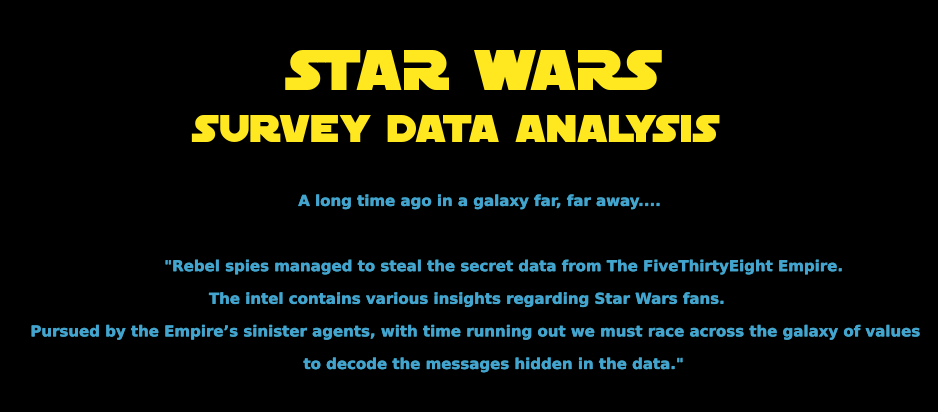

In [3]:
fig, ax = plt.subplots(figsize=(16, 3))
fig.patch.set_facecolor('black')
fig.suptitle('STAR WARS ', family='SF Distant Galaxy', fontsize=60, color="#FFE81F", y =0.7, x=0.52)
plt.text(s='Survey Data analysis',  family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.2,x=0.18)

text0 = plt.text(s='A long time ago in a galaxy far, far away....', color='#43a5cf', weight='heavy', x=0.3, y=-0.2, size=15)
text1 = plt.text(s='"Rebel spies managed to steal the secret data from The FiveThirtyEight Empire.', color='#43a5cf', weight='heavy', x=0.15, y=-0.6, size=15)
text2 = plt.text(s='The intel contains various insights regarding Star Wars fans. ', color='#43a5cf', weight='heavy', x=0.2, y=-0.8, size=15)
text3 = plt.text(s='Pursued by the Empire’s sinister agents, with time running out we must race across the galaxy of values', color='#43a5cf', weight='heavy', x=0, y=-1, size=15)
text4 = plt.text(s=' to decode the messages hidden in the data."  ', color='#43a5cf', weight='heavy', x=0.3, y=-1.2, size=15)
text5 = plt.text(s='   ', color='#43a5cf', weight='heavy', x=0.3, y=-1.4, size=15)

texts = [text0, text1, text2, text3, text4]
for text in texts:
    text.set_path_effects([path_effects.Stroke(offset=(0.3, 0.3),linewidth=0.2, foreground='#4BD5EE'),
                       path_effects.Normal()])
# #

ax.set_facecolor('black')

<a id='inital1'></a>

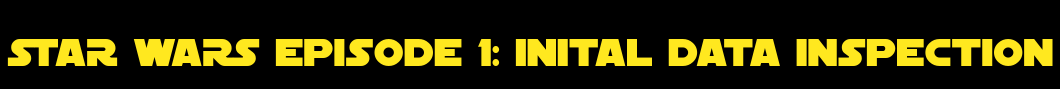

In [4]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('STAR WARS episode 1: Inital data inspection', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

[back to top](#index)

In [5]:
star_wars = pd.read_csv("star_wars2.csv", encoding="ISO-8859-1")

In [6]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
star_wars_1row = star_wars.iloc[0]
star_wars = star_wars.iloc[1:]

In [8]:
star_wars.columns.tolist()

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

# Conclusions:
* We're dealing with a relatively small set of data:
    * 1186 rows and 28 columns
* We will have to rename some of the columns and replace cell values with ones that are easier to analyze (integers or booleans)
* Before we can move on, lets quickly remind everyone the timeline of Star Wars movies:

In [9]:
# Wikipedia data:
titles_m = []
years_m = []
for num in range(3,9):
    ep = wikipedia.page(star_wars_1row[num])
    titles_m.append(star_wars_1row[num])
    x = re.search(r"(\d{4})", ep.content)
    years_m.append(x.group(0))

In [10]:
# create a small df from wiki data:
movie_frame = pd.DataFrame({'Premiere date':years_m, 'Title':titles_m})
movie_frame = movie_frame.sort_values('Premiere date')
yrs_sorted = movie_frame['Premiere date'].astype(int).to_list()
movie_frame['Premiere date'] = movie_frame['Premiere date'].astype(int)
titles_sorted = movie_frame['Title'].str[11:].tolist()

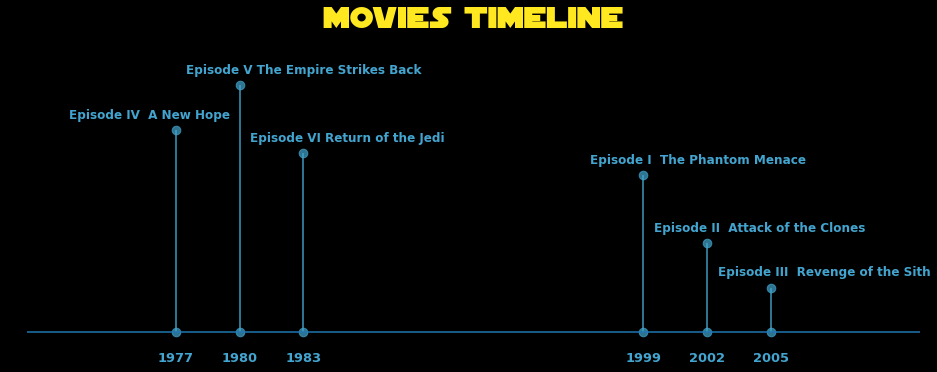

In [11]:
# plot the dates and movie titles:
for_scat = [9,11,8,7,4,2,0,0,0,0,0,0]
fig, ax = plt.subplots(figsize=(16,5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.vlines(x=movie_frame['Premiere date'], ymin=0, ymax=for_scat[:6], color='#43a5cf', alpha=0.7, linewidth=2)
ax.axhline(0)
ax.scatter(x=[movie_frame['Premiere date'], movie_frame['Premiere date']], y=for_scat, s=75, color='#43a5cf', alpha=0.7)
ax.set_xticks(movie_frame['Premiere date'])
for location in [ 'left', 'top','right', 'bottom']:
            ax.spines[location].set_visible(False)
plt.xlim(1970,2012)
ax.set_xticklabels(yrs_sorted, rotation=0, color='#43a5cf', weight='heavy', size=13)
for num in range(1,6):
    ax.annotate(xy=(yrs_sorted[num]-2.5,for_scat[num]+0.5), text=titles_sorted[num], color='#43a5cf', weight='heavy', size=12)
ax.annotate(xy=(yrs_sorted[0]-5,for_scat[0]+0.5), text=titles_sorted[0], color='#43a5cf', weight='heavy', size=12)
plt.title('Movies timeline', family='SF Distant Galaxy', fontsize=32, color="#FFE81F", pad=45)
plt.show()

# Movies timeline:
* We've scraped the 'date' data from Wikipedia for every title in our database
* We can see the old movies from 1970s and 1980s - we will call them **'old trilogy'**
* Around 20 years later came the prequel trilogy - we'll be calling it the **'new trilogy'**

<a id='data_clean'></a>

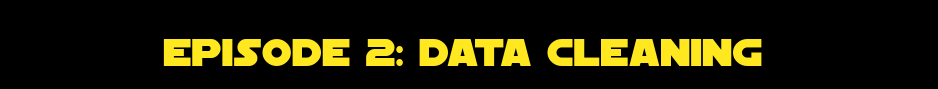

In [12]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('episode 2: Data cleaning', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

[back to top](#index)

In [13]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [14]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = np.where(star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=='Yes',True,False)

In [15]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [16]:
star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].notnull(),'Do you consider yourself to be a fan of the Star Wars film franchise?'] = np.where(star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].notnull(),'Do you consider yourself to be a fan of the Star Wars film franchise?']=='Yes',True,False)

In [17]:
star_wars['Which character shot first?'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [18]:
star_wars.loc[star_wars['Which character shot first?'] == 'I don\'t understand this question', 'Which character shot first?'] = 'I don\'t understand'

In [19]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [20]:
# renaming columns:
for n in range(3,9):
    c = n - 2
    star_wars = star_wars.rename(columns= {star_wars.columns[n]: 'seen_' + str(c)}) 
    
seen_not_seen = {np.NaN: False,
    "Star Wars: Episode I  The Phantom Menace": True,  
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True 
    
}
for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(seen_not_seen)

In [21]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
# renaming columns:
for n in range(9,15):
    c = n - 8
    star_wars = star_wars.rename(columns= {star_wars.columns[n]: 'ranking_' + str(c)}) 

In [22]:
# renaming character columns:
for n in range(15,29):
    star_wars = star_wars.rename(columns= {star_wars.columns[n]:star_wars_1row[n]})
    
# replacing string values with point values:
opinions = star_wars.iloc[:,15].value_counts().index.tolist()
opinions.pop(3)
n = 6
opinions_dictionary = {}
for op in opinions:
    n -= 1
    opinions_dictionary[op] = n

for c in star_wars.columns[15:29]:
    star_wars[c] = star_wars[c].map(opinions_dictionary)

<a id='ratingm'></a>

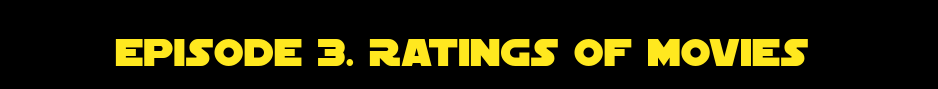

In [23]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('Episode 3. Ratings of movies', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

[back to top](#index)

In [24]:
# atm the most favorite film is getting the lowest score, we want to reverse that:
star_wars.iloc[:,9:15] = 7 - star_wars.iloc[:,9:15]

In [25]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.267066
ranking_2    2.912679
ranking_3    2.658683
ranking_4    3.727273
ranking_5    4.486842
ranking_6    3.952153
dtype: float64

In [26]:
star_wars['rate_new_trilogy'] = star_wars[star_wars.columns[9:12]].mean(axis=1)
star_wars['rate_old_trilogy'] = star_wars[star_wars.columns[12:15]].mean(axis=1)

In [27]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
not_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]
normal = star_wars[star_wars["Which character shot first?"] == "I don't understand"]
nerd = star_wars[star_wars["Which character shot first?"] == "Greedo"]
pro_nerd = star_wars[star_wars["Which character shot first?"] == "Han"]

In [28]:
# creating dataframe for all various fan groups:
df = pd.DataFrame({
    'Episode Rating': list(star_wars.columns[9:15]),
    'Overall': list(star_wars[star_wars.columns[9:15]].mean()),
    'Males': list(males[males.columns[9:15]].mean()),
    'Females': list(females[females.columns[9:15]].mean()),
    'Fans': list(fan[fan.columns[9:15]].mean()),
    'Not fans': list(not_fan[not_fan.columns[9:15]].mean()),
    'Don\'t understand': list(normal[normal.columns[9:15]].mean()),
    'Greedo shot 1': list(nerd[nerd.columns[9:15]].mean()),
    'Han shot 1': list(pro_nerd[pro_nerd.columns[9:15]].mean()),
    'Views': list(star_wars[star_wars.columns[3:9]].sum())
    
})
xlabels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

In [29]:
df

,Episode Rating,Overall,Males,Females,Fans,Not fans,Don't understand,Greedo shot 1,Han shot 1,Views
0,ranking_1,3.267066,2.962175,3.570707,2.858696,4.063604,3.957377,3.142132,2.704615,673
1,ranking_2,2.912679,2.775414,3.045340,2.657609,3.408451,3.238562,2.761421,2.701538,571
2,ranking_3,2.658683,2.725118,2.581864,2.582577,2.806338,2.761438,2.573604,2.614198,550
3,ranking_4,3.727273,4.002364,3.455919,4.067029,3.066901,3.084967,3.898477,4.230769,607
4,ranking_5,4.486842,4.541371,4.430730,4.666667,4.137324,4.183007,4.629442,4.667692,758
5,ranking_6,3.952153,3.997636,3.921914,4.170290,3.528169,3.784314,3.994924,4.086154,738


# Conclusions:
* We've generated a dataframe containing movie ratings among many different groups, we'll discuss the results after plotting them on charts in further episodes:

<a id='plotting'></a>

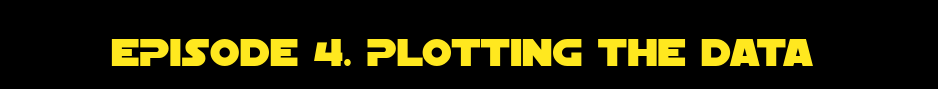

In [30]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 4. Plotting the data', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

[back to top](#index)

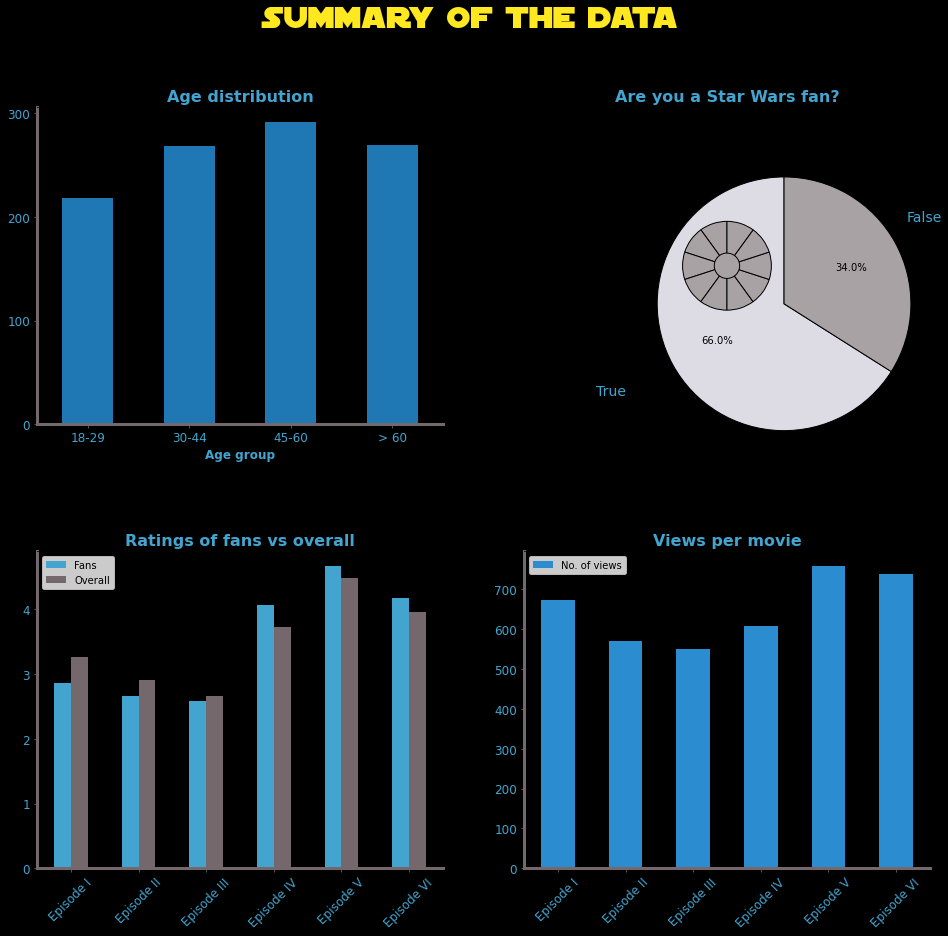

In [31]:
ticks = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
colors = ['#dddce5','#a9a2a4','#2c8cd0','#74686c','#3f3639', '#130c0e']
titles = ['Age distribution','Ratings of fans vs overall','Views per movie']
n=-1
fig, axes = plt.subplots(2,2,figsize=(16, 14))
fig.patch.set_facecolor('black')

labels = list(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].dropna().unique())
sizes = list(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())
fig.suptitle('Summary of the data', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")

ax1 = plt.subplot(221)
ax1 = star_wars['Age'].value_counts().sort_index().plot.bar()
ax1.set_facecolor('black')
ax1.set_xticklabels(star_wars['Age'].value_counts().sort_index().index, rotation=0, color='#43a5cf')
ax1.set_yticks([0,100,200,300])
ax1.set_yticklabels(['0','100','200','300'], color='#43a5cf')
ax1.set_xlabel('Age group', color='#43a5cf', weight='heavy', size=12)
for location in [ 'left', 'bottom']:
            ax1.spines[location].set_linewidth(3)
            ax1.spines[location].set_color('#74686c')     

ax2 = plt.subplot(222)
patches, texts, autotexts = ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
                                   labeldistance=1.42, center=(-1.25,0), wedgeprops={'edgecolor' :'black', })
ax2.set_title('Are you a Star Wars fan?', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', size=16)
for el in texts:
    el.set_fontsize(14)
    el.set_color('#43a5cf')
# DEATH STAR MOD:
for_the_empire = [1,1,1,1,1,1,1,1,1,1]
plt.pie(for_the_empire,radius=0.35,startangle=90, wedgeprops={'edgecolor' :'black', 'fc':'#a9a2a4'},center=(-1.7,0.3) )
death_star2 = plt.Circle((-1.7,0.3),0.1,ec='black', fc='#a9a2a4')
fig = plt.gcf()
fig.gca().add_artist(death_star2)
    
ax3 = plt.subplot(223)
df.plot(x="Episode Rating", y=["Fans", "Overall"], kind="bar",ax=axes[1][0],color=['#43a5cf', '#74686c'])
plt.legend(loc=2)
ax4 = plt.subplot(224)
df.plot(x="Episode Rating", y="Views", kind="bar",ax=axes[1][1], color=colors[2], label='No. of views')
plt.legend(loc=2)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
axes = [ax1, ax3, ax4]
for ax in axes:
    for location in [ 'left', 'bottom']:
            ax.spines[location].set_linewidth(3)
            ax.spines[location].set_color('#74686c')
    n+=1
    ax.tick_params(labelsize=12, color='#74686c')
    ax.set_facecolor('black') 
    ax.set_title(titles[n], color='#43a5cf', weight='heavy',  size=16)
axes2 = [ax3, ax4]
for ax in axes2:
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels(ticks, rotation=45, color='#43a5cf')
    plt.setp(ax.get_yticklabels(), color='#43a5cf')
    ax.set_xlabel(None)
plt.show()

# Conclusions:
* Majority (66%) of respondents claimed to be fans of the franchise
* Old trilogy movies tend to have a higher ranking, than new trilogy movies. 
* Fans rate old trilogy higher than general population, and new trilogy lower than general population
* Unfortunately the survey minimum age is 18, we're are missing a very important part of the fandom population: under 18s.

<a id='truef'></a>

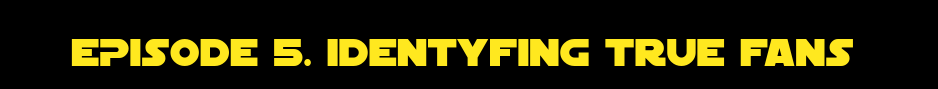

In [32]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 5. Identyfing true fans', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

[back to top](#index)

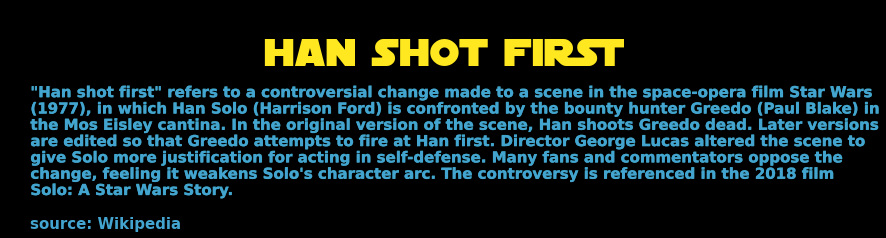

In [33]:
fig, ax = plt.subplots(figsize=(10, 1))
# lets try the wikipedia library:
my_str = wikipedia.summary("Han shot first")
lines = tr.wrap(my_str, width=100)
fig.patch.set_facecolor('black')
fig.suptitle("Han shot first", family='SF Distant Galaxy', fontsize=40, color="#FFE81F", x=0.7,y =0.5)
z = 0.3
for line in lines:
    z -= 0.3
    text = plt.text(s=line, color='#43a5cf', weight='heavy', x=0.0, y=-0.6+z, size=15)
    text.set_path_effects([path_effects.Stroke(offset=(0.3, 0.3),linewidth=0.2, foreground='#4BD5EE'),
                       path_effects.Normal()])
ax.set_facecolor('black')
plt.text(s='source: Wikipedia', color='#43a5cf', weight='heavy', size=15, x = 0, y=-3)
plt.show()

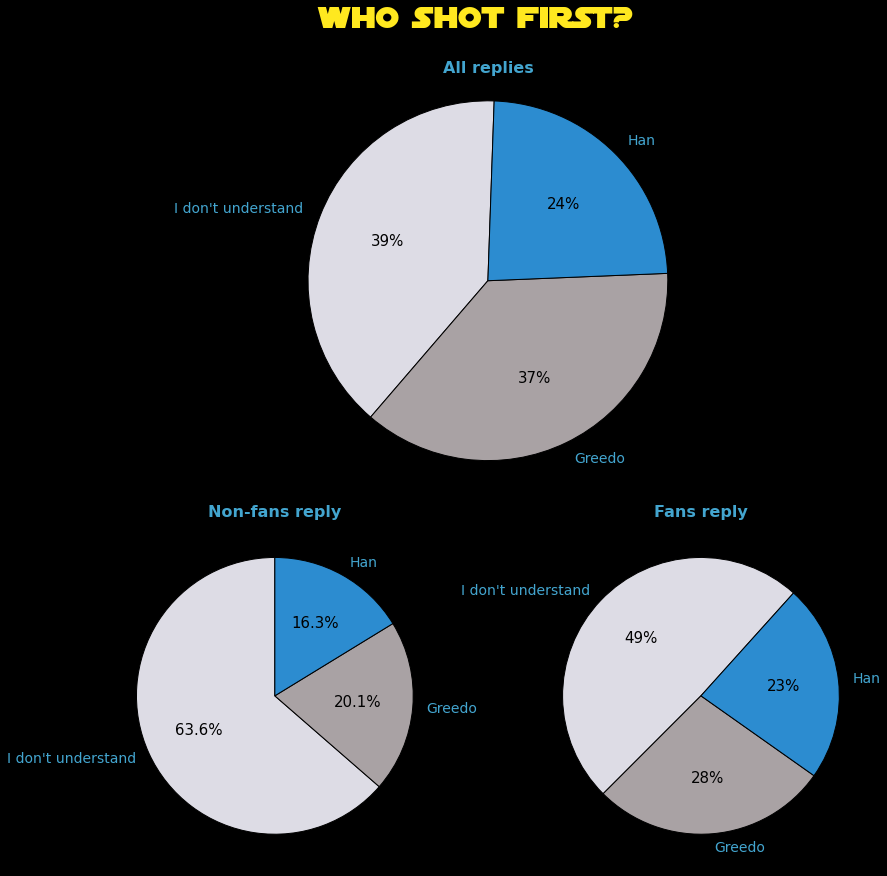

In [34]:
labels_han = list(star_wars['Which character shot first?'].dropna().unique())
sizes_han = list(star_wars['Which character shot first?'].value_counts())


labels_han_fan = list(fan['Which character shot first?'].dropna().unique())
sizes_han_fan = list(fan['Which character shot first?'].value_counts())
labels_not_fan = list(not_fan['Which character shot first?'].dropna().unique())
sizes_not_fan = list(not_fan['Which character shot first?'].value_counts())
# labels = list(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].dropna().unique())
# sizes = list(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())
textprops = {"fontsize":15, "color":'black'} # Font size of text in pie chart

fig, axes = plt.subplots(figsize=(14, 14))
fig.patch.set_facecolor('black')
fig.suptitle('Who shot first?', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")


ax0 = plt.subplot(211)
patches, texts, autotexts = ax0.pie(sizes_han, labels=labels_han, autopct='%1.0f%%', radius=1.3,
                         colors=colors, textprops=textprops, wedgeprops={'edgecolor' :'black' },startangle=88)
ax0.set_title('All replies', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', pad=35, size=16)


ax2 = plt.subplot(223)
patches, texts1, autotexts = ax2.pie(sizes_not_fan, labels=labels_not_fan, autopct='%1.1f%%', colors=colors, textprops=textprops, wedgeprops={'edgecolor' :'black' },
 startangle=90)
ax2.set_title('Non-fans reply', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', size=16)

ax3 = plt.subplot(224)
patches, texts2, autotexts = ax3.pie(sizes_han_fan, labels=labels_han_fan, autopct='%1.0f%%', 
                            colors=colors, textprops=textprops, wedgeprops={'edgecolor' :'black' },startangle=48)
ax3.set_title('Fans reply', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans',size=16)

for el in [texts, texts1, texts2]:
    for n in el:
        n.set_fontsize(14)
        n.set_color('#43a5cf')
plt.show()

# Conclusions:
* **Half of the people who claimed to be fans didn't understand the question "Who shot first?"**
* More than 60 percent of people who didn't claim to be fans didn't understand the question "Who shot first?"
* Quarter of the population answered 'Han' - this is **potentially** the best marker to filter out **the most conservative fans** (the ones favoring old trilogy over new movies)
* participants who answered 'Han' to "Who shot first?" **will be called 'Han shot first' group in further analysis**, we'll also create a 'Greedo' group and 'Don't understand' group

<a id='groups'></a>

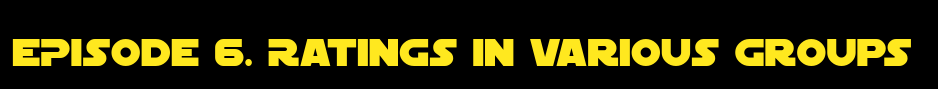

In [35]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 6. Ratings in various groups', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

[back to top](#index)

In [36]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [37]:
# creating a sorted list of education levels - we'll skip  'Less than high school degree' (only 7 respondents)
# and age groups, income groups, who shot first groups...
edu_list = star_wars['Education'].value_counts().index[:4].to_list()
edu_list.insert(0, edu_list.pop())
age_list = star_wars['Age'].value_counts().index.tolist()
age_list.insert(0, age_list.pop())
age_list.insert(1, age_list.pop())
income_list = star_wars['Household Income'].value_counts().index.tolist()
income_list.insert(0, income_list.pop(2))
income_list.insert(0, income_list.pop())
han_list = star_wars['Which character shot first?'].value_counts().index.tolist()
han_list.insert(0, han_list.pop())
colors2 = ['#0d5aa0','#c48447','#fbfffe','#af639e','#f1b084','#9f5a60', '#343d9b','#5f9fdd','#452f11']

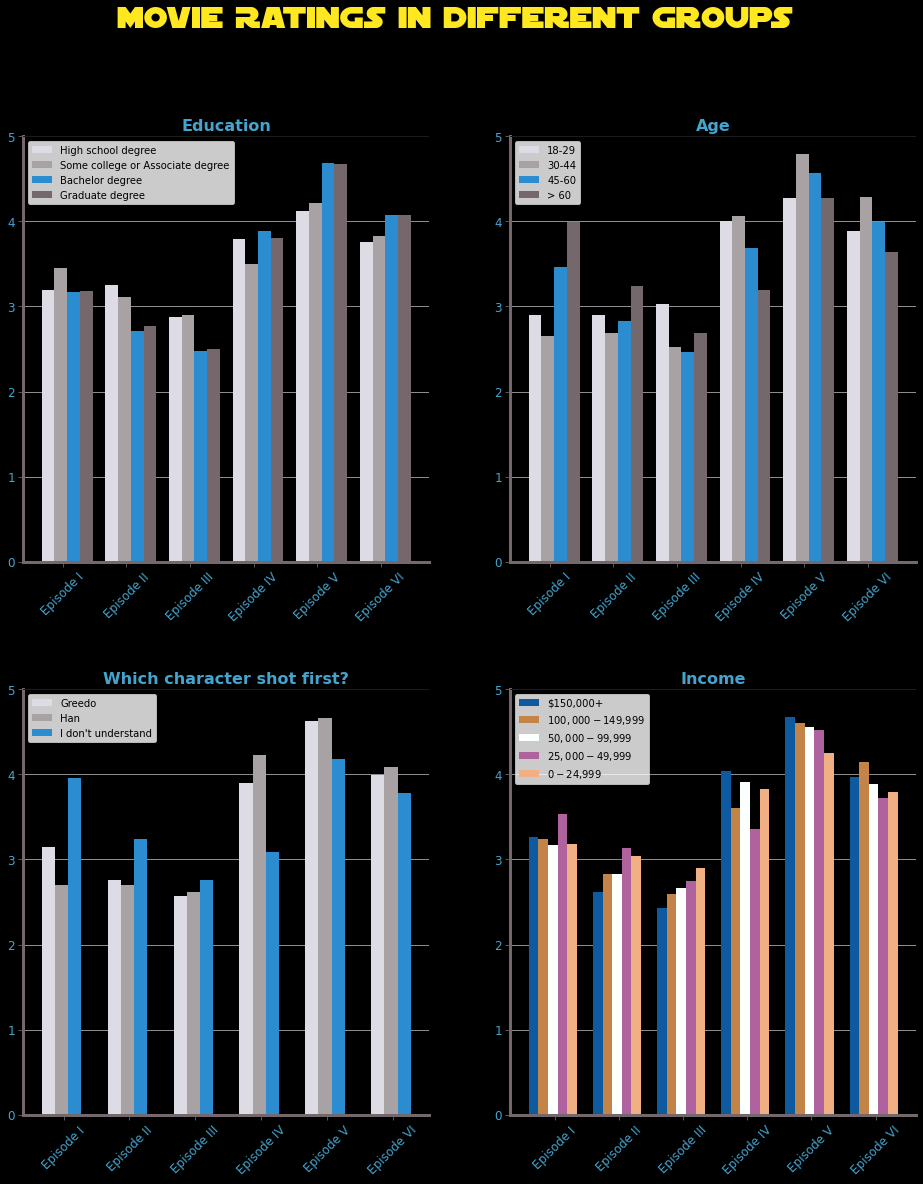

In [38]:
bar_cols = ['Education', 'Age', 'Which character shot first?']
list_of_lists = [edu_list, age_list , han_list ,income_list]
subplot_list = [221,222,223]
list_axes = [ax1,ax2,ax3,ax4]
fig, axes = plt.subplots(figsize=(16, 18))
fig.patch.set_facecolor('black')
fig.suptitle('Movie Ratings in different groups', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")
# grid = plt.GridSpec(2, 2, wspace=0.1, hspace=0.6)

# stacked bar charts for all the groups of bar_cols list:
for i in range(0,3):
    width = 0.2
    list_axes[i] = plt.subplot(subplot_list[i])
    m=-1
    col = bar_cols[i]
    x = np.arange(6)
    for els in list_of_lists[i]:    
        m+=1
        width += 0.2
        plt.bar(x + width, 
        star_wars[star_wars[col]==els][star_wars[star_wars[col]==els].columns[9:15]].mean(), 
          width = 0.2, label=els, color=colors[m], zorder=2)       
    plt.title(col)

# last bar chart (it has a different width so loop would't work on it well)
ax4 = plt.subplot(224)
n=-1
width = 0.15
# plot a bar for every educational group:
for els in income_list:
    n+=1
    width += 0.15
    plt.bar(x + width, star_wars[star_wars['Household Income']==els][star_wars[star_wars['Household Income']==els].columns[9:15]].mean(), 
          width = 0.15, label=els, color=colors2[n], zorder=2)
plt.title('Income')

# styling of all the charts:
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for ax in list_axes + [ax4]:
        for location in [ 'left', 'bottom']:
                ax.spines[location].set_linewidth(3)
                ax.spines[location].set_color('#74686c')
        ax.set_ylim(0,5)
        ax.set_xticks(x + width/1.425)
        ax.set_xticklabels(ticks, rotation=45, color='#43a5cf')
        ax.tick_params(length=5, labelsize=12, color='#74686c')
        plt.setp(ax.get_yticklabels(), color='#43a5cf')
        ax.set_facecolor('black')
        ax.set_title(ax.get_title(), color='#43a5cf', weight='heavy', size=16)
        ax.legend()
        ax.grid(axis='y', zorder=0)
plt.show() 

In [39]:
df_new_old = pd.DataFrame({
    'Trilogy': list(star_wars.columns[-2:]),
    'Overall': list(star_wars[star_wars.columns[-2:]].mean()),
    'Males': list(males[males.columns[-2:]].mean()),
    'Females': list(females[females.columns[-2:]].mean()),
    'Fans': list(fan[fan.columns[-2:]].mean()),
    'Not fans': list(not_fan[not_fan.columns[-2:]].mean()),
    'Don\'t understand': list(normal[normal.columns[-2:]].mean()),
    'Greedo shot 1': list(nerd[nerd.columns[-2:]].mean()),
    'Han shot 1': list(pro_nerd[pro_nerd.columns[-2:]].mean()),
    '30-44 yrs old': list(star_wars[star_wars["Age"] == "30-44"][star_wars[star_wars["Age"] == "30-44"].columns[-2:]].mean()),
    '> 60 yrs old': list(star_wars[star_wars["Age"] == "> 60"][star_wars[star_wars["Age"] == "> 60"].columns[-2:]].mean()),
     'Views': list(star_wars[star_wars.columns[-2:]].sum())
})
df_new_old

,Trilogy,Overall,Males,Females,Fans,Not fans,Don't understand,Greedo shot 1,Han shot 1,30-44 yrs old,> 60 yrs old,Views
0,rate_new_trilogy,2.947767,2.823089,3.066751,2.701389,3.426643,3.319717,2.825719,2.676410,2.627214,3.304836,2464.333333
1,rate_old_trilogy,4.055423,4.180457,3.936188,4.301329,3.577465,3.684096,4.174281,4.328205,4.380032,3.701209,3390.333333


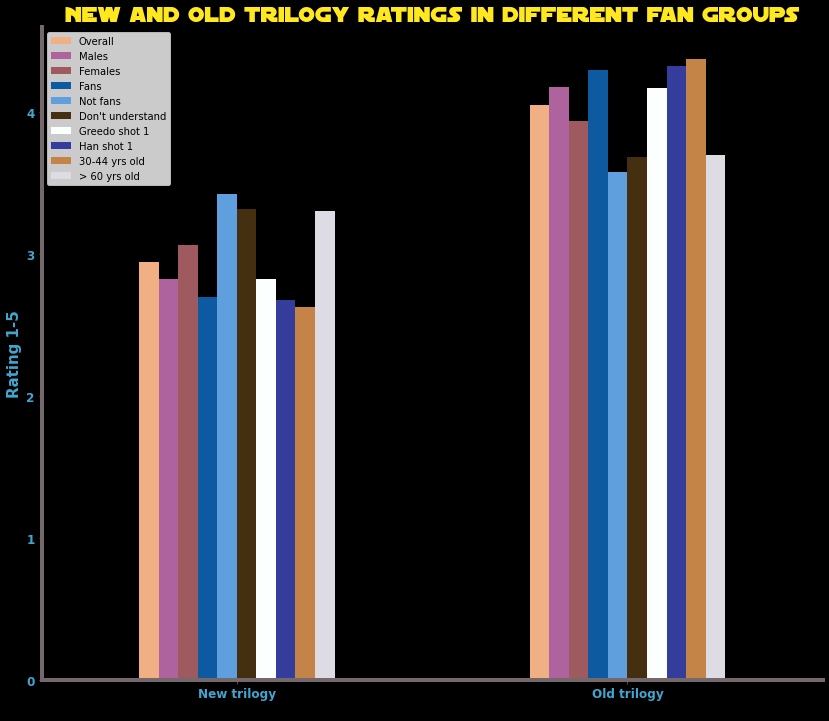

In [40]:
colors2 = [ '#f1b084', '#af639e', '#9f5a60', '#0d5aa0','#5f9fdd','#452f11','#fbfffe','#343d9b','#c48447']
labels = ['New trilogy', 'Old trilogy']
fig, axes = plt.subplots(figsize=(14, 12))

fig.patch.set_facecolor('black')

ax3 = plt.subplot()
df_new_old.plot(x="Trilogy", y=df_new_old.columns[1:-1], kind="bar",color=colors2+colors, ax=ax3)

fig.subplots_adjust(hspace=0.4, wspace=0.2)
axes = [ax3]
for ax in axes:
    for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
    for location in [ 'left', 'bottom']:
            ax.spines[location].set_linewidth(4)
            ax.spines[location].set_color('#74686c')
    ax.set_xticklabels(labels, rotation=0, color='#43a5cf', size=15, weight='heavy')
    ax.tick_params(labelsize=12, color='#74686c')
    ax.set_facecolor('black')
    plt.setp(ax.get_yticklabels(), color='#43a5cf', weight='heavy')
    ax.set_ylabel('Rating 1-5', color='#43a5cf', size=15, weight='heavy')
    ax.set_title('New and Old Trilogy ratings in different fan groups', family='SF Distant Galaxy', fontsize=22, color="#FFE81F")
     
plt.show()

In [41]:
# average rating difference old - new trilogy in Graduates:
star_wars[star_wars['Education']=='Graduate degree']['rate_old_trilogy'].mean()-star_wars[star_wars['Education']=='Graduate degree']['rate_new_trilogy'].mean()

1.3665191740412985

In [42]:
# average rating difference old - new trilogy in Han shot first group:
star_wars[star_wars["Which character shot first?"] == "Han"]['rate_old_trilogy'].mean()-star_wars[star_wars["Which character shot first?"] == "Han"]['rate_new_trilogy'].mean()

1.6517948717948716

In [43]:
# average rating difference old - new trilogy in Greedo shot first group:
star_wars[star_wars["Which character shot first?"] == "Greedo"]['rate_old_trilogy'].mean()-star_wars[star_wars["Which character shot first?"] == "Han"]['rate_new_trilogy'].mean()

1.4978706234543795

In [44]:
# average rating difference old - new trilogy in Income group 150k+:
star_wars[star_wars['Household Income'] == "$150,000+"]['rate_old_trilogy'].mean()-star_wars[star_wars['Household Income'] == "$150,000+"]['rate_new_trilogy'].mean()

1.4588744588744595

In [45]:
# average rating difference old - new trilogy in Age group '30-44':
star_wars[star_wars["Age"] == "30-44"]['rate_old_trilogy'].mean()-star_wars[star_wars["Age"] == "30-44"]['rate_new_trilogy'].mean()

1.7528180354267304

# Conclusions:
* Every single age, education, sex etc. group prefers old movies over the new ones, though in some cases single movie from the new trilogy can have a better rating than a single movie from the old trilogy (eg. Episode I vs Episode IV among above 60 year olds), on average the new trilogy will always score lower than old trilogy among every group
* Education and income levels are corelated with old/ new movie ratings: **the wealthier and better educated participants tend to rate the old trilogy higher and give lower marks to new trilogy**, we can observe that as income/ education is rising: the rating of old movies is improving and the rating of new movies is decreasing
* The **oldest age group (above 60 yrs old) tends to have the most uniform rating of every movie**, oddly the original trilogy has the lowest rating in the oldest group (that's the only age group that could've seen the original old trilogy, while being adults!)
* The age group with the biggest rating differences between old/ new movies is 30-44, naturally the old trilogy scores higher marks, majority of that age group, wasn't even born when the first movie premiered!
* Participants who didn't understand the question of 'Who shot first?' are naturally more forgiving towards the new movies
* Females have a better opinion of the new movies than males
* An unexpected discovery is that **the most conservative group, (the one where the difference between old and new trilogy rating is the highest) is not the "Han shot first" group! The difference is higher among the age group 30-44!**

<a id='trek'></a>

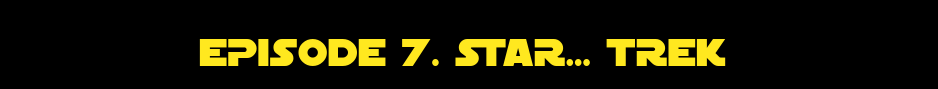

In [46]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 7. STAR... TREK', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

[back to top](#index)

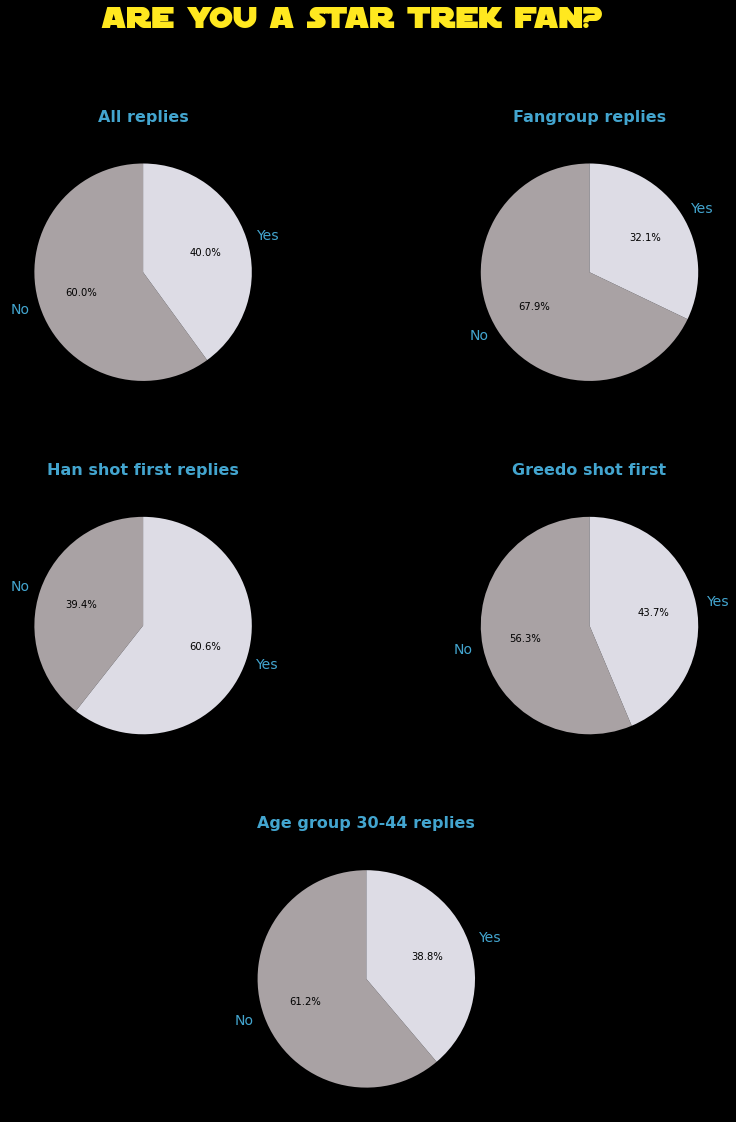

In [47]:
startrek_sizesf = list(fan['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())
startrek_sizespnerd = list(pro_nerd['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())
startrek_sizespnerd.reverse()
startrek_sizes = list(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())
greedo_sizes = list(nerd['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())
age_sizes = star_wars[star_wars["Age"] == "30-44"]['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(normalize=True)
colours = {'Yes': '#dddce5', 'No': '#a9a2a4'}
labels = ['No', 'Yes']
grid = plt.GridSpec(3, 2, wspace=0, hspace=0.3)
st_lists = [startrek_sizes, startrek_sizesf, startrek_sizespnerd, greedo_sizes, age_sizes]
grid_list = [grid[0, 0],grid[0, 1],grid[1, 0],grid[1, 1], grid[2,0:]]
title_list = ['All replies', 'Fangroup replies', 'Han shot first replies', 'Greedo shot first', 'Age group 30-44 replies']

fig, axes = plt.subplots(figsize=(16, 18))
grid = plt.GridSpec(3, 2, wspace=0, hspace=0.3)
fig.patch.set_facecolor('black')
fig.suptitle('Are you a Star Trek fan?', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")

for i in range(0,5):
    ax1 = plt.subplot(grid_list[i])
    patches, texts, autotexts = ax1.pie(st_lists[i], labels=labels, autopct='%1.1f%%',  
                                    colors=[colours[key] for key in labels[0:]], startangle=90)
    ax1.set_title(title_list[i], color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', pad=15, size=16)
    for n in texts:
        n.set_fontsize(14)
        n.set_color('#43a5cf')
plt.show()

# Conclusions:
* Majority of survey participants do not identify as fans of Star Trek
* 'Fans' of Star Wars are even more resistant towards Star Trek
* **The groups 'Han shot first' and age group '30-44' years have almost opposite results! It's a surprising result, given that their movie ratings are very similar!**
* 'Han shot first' group has the highest amount of Star Trek fans

<a id='chars'></a>

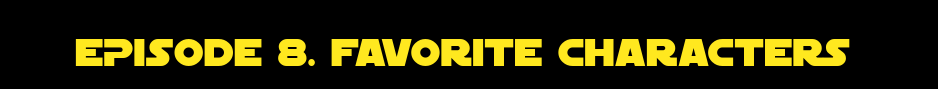

In [48]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 8. Favorite characters', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)

ax.set_facecolor('black')

[back to top](#index)

In [49]:
# create a separate df for character rating:
chars_frame = pd.DataFrame({
    'Character': list(star_wars.columns[15:29]),
    'Overall': list(star_wars[star_wars.columns[15:29]].mean()),
    'Males': list(males[males.columns[15:29]].mean()),
    'Females': list(females[females.columns[15:29]].mean()),
    'Fans': list(fan[fan.columns[15:29]].mean()),
    'Not fans': list(not_fan[not_fan.columns[15:29]].mean()),
    'Don\'t understand': list(normal[normal.columns[15:29]].mean()),
    'Greedo shot 1': list(nerd[nerd.columns[15:29]].mean()),
    'Han shot 1': list(pro_nerd[pro_nerd.columns[15:29]].mean()),
    '30-44': list(star_wars[star_wars["Age"] == "30-44"][star_wars[star_wars["Age"] == "30-44"].columns[15:29]].mean()),
    '> 60': list(star_wars[star_wars["Age"] == "> 60"][star_wars[star_wars["Age"] == "> 60"].columns[15:29]].mean()) 
})
chars_frame['Min score group'] = chars_frame.iloc[:,1:11].idxmin(axis=1)
chars_frame['Max score group'] = chars_frame.iloc[:,1:11].idxmax(axis=1)
chars_frame['Range'] = chars_frame.iloc[:,1:11].max(axis=1) - chars_frame.iloc[:,1:11].min(axis=1)
chars_frame = chars_frame.round(2)
chars_frame       

,Character,Overall,Males,Females,Fans,Not fans,Don't understand,Greedo shot 1,Han shot 1,30-44,> 60,Min score group,Max score group,Range
0,Han Solo,4.67,4.68,4.68,4.84,4.33,4.53,4.76,4.74,4.70,4.76,Not fans,Fans,0.51
1,Luke Skywalker,4.58,4.56,4.61,4.70,4.34,4.51,4.65,4.59,4.58,4.74,Not fans,> 60,0.40
2,Princess Leia Organa,4.56,4.53,4.59,4.69,4.29,4.47,4.61,4.60,4.56,4.66,Not fans,Fans,0.40
3,Anakin Skywalker,3.78,3.65,3.89,3.83,3.64,3.86,4.02,3.55,3.48,4.08,30-44,> 60,0.60
4,Obi Wan Kenobi,4.63,4.63,4.64,4.77,4.35,4.52,4.68,4.71,4.60,4.73,Not fans,Fans,0.42
5,Emperor Palpatine,3.07,3.21,2.87,3.10,2.99,2.99,3.07,3.11,3.10,3.09,Females,Males,0.34
6,Darth Vader,3.48,3.75,3.20,3.69,3.07,3.19,3.38,3.78,3.70,3.33,Not fans,Han shot 1,0.72
7,Lando Calrissian,3.64,3.65,3.61,3.76,3.28,3.44,3.65,3.75,3.63,3.75,Not fans,Fans,0.48
8,Boba Fett,3.36,3.49,3.18,3.45,3.12,3.13,3.36,3.50,3.57,3.15,Not fans,30-44,0.45
9,C-3P0,4.40,4.24,4.58,4.52,4.17,4.36,4.41,4.42,4.34,4.57,Not fans,Females,0.41


In [50]:
chars_frame['std'] = chars_frame['Character'].apply(lambda x: star_wars[x].std())

In [51]:
chars_frame

,Character,Overall,Males,Females,Fans,Not fans,Don't understand,Greedo shot 1,Han shot 1,30-44,> 60,Min score group,Max score group,Range,std
0,Han Solo,4.67,4.68,4.68,4.84,4.33,4.53,4.76,4.74,4.70,4.76,Not fans,Fans,0.51,0.634612
1,Luke Skywalker,4.58,4.56,4.61,4.70,4.34,4.51,4.65,4.59,4.58,4.74,Not fans,> 60,0.40,0.688753
2,Princess Leia Organa,4.56,4.53,4.59,4.69,4.29,4.47,4.61,4.60,4.56,4.66,Not fans,Fans,0.40,0.734312
3,Anakin Skywalker,3.78,3.65,3.89,3.83,3.64,3.86,4.02,3.55,3.48,4.08,30-44,> 60,0.60,1.153302
4,Obi Wan Kenobi,4.63,4.63,4.64,4.77,4.35,4.52,4.68,4.71,4.60,4.73,Not fans,Fans,0.42,0.709146
5,Emperor Palpatine,3.07,3.21,2.87,3.10,2.99,2.99,3.07,3.11,3.10,3.09,Females,Males,0.34,1.319358
6,Darth Vader,3.48,3.75,3.20,3.69,3.07,3.19,3.38,3.78,3.70,3.33,Not fans,Han shot 1,0.72,1.535528
7,Lando Calrissian,3.64,3.65,3.61,3.76,3.28,3.44,3.65,3.75,3.63,3.75,Not fans,Fans,0.48,0.956120
8,Boba Fett,3.36,3.49,3.18,3.45,3.12,3.13,3.36,3.50,3.57,3.15,Not fans,30-44,0.45,1.147555
9,C-3P0,4.40,4.24,4.58,4.52,4.17,4.36,4.41,4.42,4.34,4.57,Not fans,Females,0.41,0.842394


In [52]:
chars_frame['Max score group'].value_counts()

Fans          5
> 60          3
Females       3
Males         1
Han shot 1    1
30-44         1
Name: Max score group, dtype: int64

In [53]:
chars_frame['Min score group'].value_counts()

Not fans    11
30-44        2
Females      1
Name: Min score group, dtype: int64

The lowest  score for majority of character comes from the group of people who claimed not to be a fan of Star Wars. In fact, we have to remove them from this ranking to see what other groups give negative scores to characters:

In [54]:
chars_frame2 = chars_frame.drop(columns='Not fans')
chars_frame2['Min score'] = chars_frame2.iloc[:,1:9].idxmin(axis=1)

In [55]:
chars_frame2['Min score'].value_counts()

Don't understand    8
30-44               3
Males               2
Females             1
Name: Min score, dtype: int64

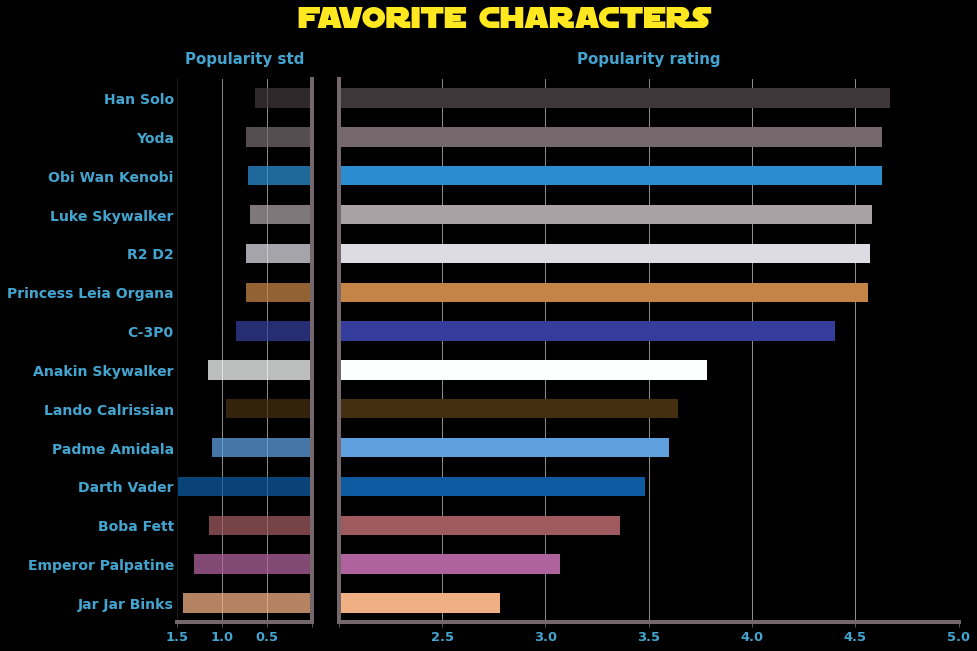

In [56]:
fig, axes = plt.subplots(figsize=(14, 10))

chars_frame = chars_frame.sort_values(by=['Overall'])
grid = plt.GridSpec(1, 5, wspace=0.2, hspace=0.3)
fig.patch.set_facecolor('black')
fig.suptitle('Favorite characters', family='SF Distant Galaxy', fontsize=32, color="#FFE81F", x=0.45)

ax1 = plt.subplot(grid[0, 0])
chars_frame.plot(x="Character", y='std', kind="barh",color=colors2+colors, ax=ax1, legend=False, alpha=0.75, zorder=2)
for location in [ 'right', 'bottom']:
    ax1.spines[location].set_linewidth(4)
    ax1.spines[location].set_color('#74686c')
ax1.set_yticks(range(0,len(range(15,29))))
ax1.set_yticklabels(chars_frame['Character'], rotation=0, color='#43a5cf', ha='right',  weight='heavy',  size=14)
ax1.set_title('Popularity std', color='#43a5cf', weight='heavy',  size=15, pad=15)
plt.xlim(1.5,0)

ax2 = plt.subplot(grid[0, 1:])
chars_frame.plot(x="Character", y='Overall', kind="barh",color=colors2+colors, ax=ax2, legend=False, zorder=2)
for location in [ 'left', 'bottom']:
        ax2.spines[location].set_linewidth(4)
        ax2.spines[location].set_color('#74686c')
ax2.set_yticklabels(chars_frame['Character'], visible=False)
plt.xlim(2,5)
ax2.set_title('Popularity rating', color='#43a5cf', weight='heavy',  size=15, pad=15) 

for ax in [ax1, ax2]:
    ax.tick_params(axis='y',length=0)
    ax.tick_params(axis='x',length=5, color='#74686c')
    ax.set_facecolor('black')
    plt.setp(ax.get_xticklabels()[1:], color='#43a5cf', weight='heavy', size=13)
    ax.set_ylabel(None)
    ax.spines['top'].set_visible(False)
    ax.grid(axis='x', zorder=0)
plt.show()

# Conclusions:
* Main positive characters from the old trilogy have the highest rating of popularity
* The unpopular character have a higher standard deviation than the popular ones
* Darth Vader has the highest standard deviation - some people just adore the dark side!
* Above 60 yrs olds and female participants once again prove to be very generous in their ratings, only beaten by people who claimed to be 'fans'

<a id='geo'></a>

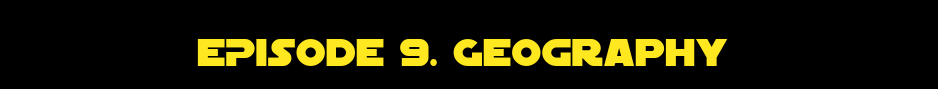

In [57]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 9. Geography', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

[back to top](#index)

In [58]:
# shapefile from: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
data = gpd.read_file('usc/cb_2018_us_division_500k.shp') 
data

,DIVISIONCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,1,0300000US1,1,New England,69,162376417481,24072855206,"MULTIPOLYGON (((-67.32259 44.61160, -67.32174 ..."
1,2,0300000US2,2,Middle Atlantic,69,256981418064,26186444931,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ..."
2,3,0300000US3,3,East North Central,69,629289745590,151252485939,"MULTIPOLYGON (((-82.73571 41.60336, -82.73392 ..."
3,4,0300000US4,4,West North Central,69,1314707528663,33020781573,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ..."
4,5,0300000US5,5,South Atlantic,69,687099317084,71741527671,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."
5,8,0300000US8,8,Mountain,69,2216504548727,20112368319,"POLYGON ((-120.00574 39.22866, -120.00559 39.2..."
6,9,0300000US9,9,Pacific,69,2319697198955,296474924140,"MULTIPOLYGON (((-147.17351 60.91154, -147.1700..."
7,6,0300000US6,6,East South Central,69,461789786924,13245708132,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
8,7,0300000US7,7,West South Central,69,1100982564361,49097374744,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."


In [59]:
dfv = star_wars['Location (Census Region)'].value_counts().to_frame()

In [60]:
dfv['region'] = dfv.index
dfv = dfv.rename(columns={'Location (Census Region)':'count'})
dfv = dfv.reset_index()

In [61]:
data = data.rename(columns={'NAME':'region'})
inner_join = pd.merge(data, dfv, on ='region', how ='inner')

In [62]:
inner_join

,DIVISIONCE,AFFGEOID,GEOID,region,LSAD,ALAND,AWATER,geometry,index,count
0,1,0300000US1,1,New England,69,162376417481,24072855206,"MULTIPOLYGON (((-67.32259 44.61160, -67.32174 ...",New England,75
1,2,0300000US2,2,Middle Atlantic,69,256981418064,26186444931,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...",Middle Atlantic,122
2,3,0300000US3,3,East North Central,69,629289745590,151252485939,"MULTIPOLYGON (((-82.73571 41.60336, -82.73392 ...",East North Central,181
3,4,0300000US4,4,West North Central,69,1314707528663,33020781573,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ...",West North Central,93
4,5,0300000US5,5,South Atlantic,69,687099317084,71741527671,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",South Atlantic,170
5,8,0300000US8,8,Mountain,69,2216504548727,20112368319,"POLYGON ((-120.00574 39.22866, -120.00559 39.2...",Mountain,79
6,9,0300000US9,9,Pacific,69,2319697198955,296474924140,"MULTIPOLYGON (((-147.17351 60.91154, -147.1700...",Pacific,175
7,6,0300000US6,6,East South Central,69,461789786924,13245708132,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",East South Central,38
8,7,0300000US7,7,West South Central,69,1100982564361,49097374744,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",West South Central,110


In [63]:

inner_join['geometry'] = inner_join.rotate(0, origin=inner_join.unary_union.centroid)

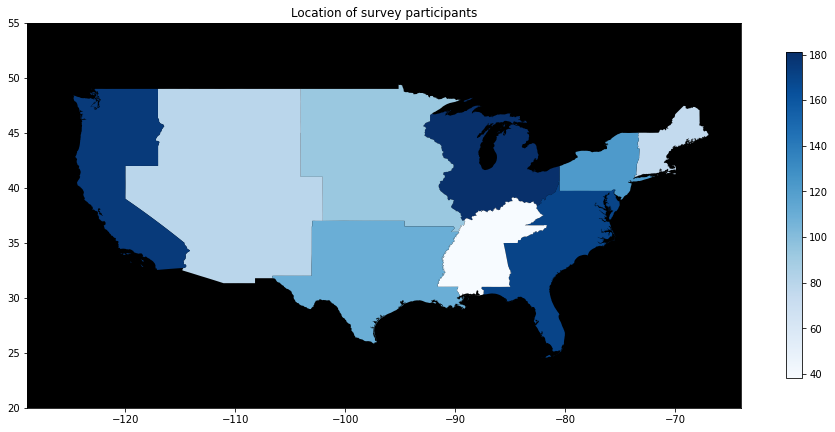

In [64]:
ax.set_facecolor('black')
ax = inner_join.plot(column="count", figsize=(16,12) ,cmap='Blues' ,legend=True,legend_kwds={'shrink': 0.5})
ax.set_xlim(-128.95, -64)
ax.set_ylim(20, 55)
ax.set_facecolor('black')
ax.set_title('Location of survey participants')
fig.patch.set_facecolor('black')
plt.show()

# Conclusions:
* Majority of participants live on the coast
* East South Central region has an abnormally low amunt of survey participants

<a id='last10'></a>

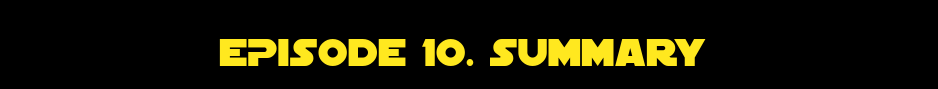

In [65]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 10. Summary', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

[back to top](#index)

# Conclusions:
* majority (66%) of respondents claimed to be fans of the franchise
* old trilogy movies tend to have a higher ranking, than new trilogy movies
* half of the people who claimed to be fans didn't understand the question "Who shot first?"
* **we can split the survey population into different groups using various factors, but the best ones are Age or answer to "Who shot first?" question**
    * **the conservative group - tends to rate the old trilogy even higher and has low opinion of the new trilogy (mostly 30-44 yrs old and answers that Han did shot first)**
    * **if we seek acceptance and high ratings we should aim for above 60 yrs olds, females and people who don't understand the question 'Who shot first?'**
    * though having low opinion of new trilogy, majority of 'Han shot first' group is also interested in Star Trek
    * as the household income and education level grow so does the average rating for old trilogy (and rating of the new trilogy drops)
* main positive characters from the old trilogy have the highest rating of popularity

